# Manipulating DataFrames with pandas

## Extracting and transforming data

In [1]:
import numpy as np
import pandas as pd

### indexing and slicing

In [2]:
df_airport = pd.read_csv('/home/xenakas/Desktop/Git/py_projects/airports/airports.csv', index_col=0, header=None, na_values = {9:['\\N']})

# export 
# df_airport.to_csv(out_csv)
# df_airport.to_csv(out_tsv, sep='\t', index=False)
# df_airport.to_excel(out_xlsx, index=False)

In [3]:
df_airport.iloc[1:3,2:4]

,3,4
0,,
2,Papua New Guinea,MAG
3,Papua New Guinea,HGU


In [4]:
df_airport.loc[1:3,2:4]

,2,3,4
0,,,
1,Goroka,Papua New Guinea,GKA
2,Madang,Papua New Guinea,MAG
3,Mount Hagen,Papua New Guinea,HGU


In [5]:
print(type(df_airport[3]), type(df_airport[[3]]))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [6]:
df_airport.loc[3:7,: ]


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports
7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3.0,E,America/Godthab,airport,OurAirports


In [7]:
df_airport.loc[7:3:-1]

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3.0,E,America/Godthab,airport,OurAirports
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [8]:
df_airport[::-7].head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
12057,Shenyang Dongta Airport,Shenyang,China,\N,ZYYY,41.784401,123.496002,0,NaN,\N,\N,airport,OurAirports
12050,Huatugou Airport,Mengnai,China,HTT,ZLHX,38.201984,90.841495,2945,NaN,\N,\N,airport,OurAirports
12043,Warren Airport,NaN,Australia,QRR,YWRN,-31.733299,147.802994,669,NaN,\N,\N,airport,OurAirports
12036,Smithton Airport,NaN,Australia,SIO,YSMI,-40.834999,145.084000,31,NaN,\N,\N,airport,OurAirports
12029,Kempsey Airport,NaN,Australia,KPS,YKMP,-31.074400,152.770004,54,NaN,\N,\N,airport,OurAirports


### filtering

In [9]:
df_a = df_airport.copy()

df_a.loc[:, df_a.all()].head(4) # all columns excluding columns containing 0

,1,2,3,4,5,6,10,11,12,13
0,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,U,Pacific/Port_Moresby,airport,OurAirports


In [10]:
df_a.loc[:, df_a.any()].head(4) # all columns excluding columns containing all 0

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [11]:
df_a.loc[:, df_a.isnull().any()].head(4) # select columns with any NaNs

,2,4,9
0,,,
1,Goroka,GKA,10.0
2,Madang,MAG,10.0
3,Mount Hagen,HGU,10.0
4,Nadzab,LAE,10.0


In [12]:
df_a.loc[:, df_a.notnull().all()].head(4) # select columns without NaNs

,1,3,5,6,7,8,10,11,12,13
0,,,,,,,,,,
1,Goroka Airport,Papua New Guinea,AYGA,-6.081690,145.391998,5282,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Papua New Guinea,AYMD,-5.207080,145.789001,20,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Papua New Guinea,AYMH,-5.826790,144.296005,5388,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Papua New Guinea,AYNZ,-6.569803,146.725977,239,U,Pacific/Port_Moresby,airport,OurAirports


In [13]:
df_a.dropna(how='any').head(4) # drop rows with any NaNs

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports


You can use the ``thresh=`` keyword argument to drop columns from the full dataset that have less than 1000 non-missing values.

In [14]:
df_a[df_a[7]>175].head(4)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1960,Nadi International Airport,Nandi,Fiji,NAN,NFFN,-17.755400,177.442993,59,12.0,U,Pacific/Fiji,airport,OurAirports
1961,Nausori International Airport,Nausori,Fiji,SUV,NFNA,-18.043301,178.559006,17,12.0,U,Pacific/Fiji,airport,OurAirports
2007,Taupo Airport,Taupo,New Zealand,TUO,NZAP,-38.739700,176.084000,1335,12.0,Z,Pacific/Auckland,airport,OurAirports
2012,Gisborne Airport,Gisborne,New Zealand,GIS,NZGS,-38.663300,177.977997,15,12.0,Z,Pacific/Auckland,airport,OurAirports


In [15]:
df_a.loc[df_a[6]<0, 6] = np.nan # change all negative to NaN

df_a.head(8)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,NaN,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,NaN,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,NaN,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports
7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3.0,E,America/Godthab,airport,OurAirports
8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3.0,E,America/Godthab,airport,OurAirports


### transforming

In [16]:
df_a.loc[:,6:9].floordiv(12).head(7) # or with np.floor_divide - elementwise

,6,7,8,9
0,,,,
1,NaN,12.0,440,0.0
2,NaN,12.0,1,0.0
3,NaN,12.0,449,0.0
4,NaN,12.0,19,0.0
5,NaN,12.0,12,0.0
6,NaN,11.0,1,0.0
7,5.0,-4.0,9,-1.0


In [17]:
df_a.loc[:,6:9].apply(lambda n: n//10).head(7) # vectorized function

,6,7,8,9
0,,,,
1,NaN,14.0,528,1.0
2,NaN,14.0,2,1.0
3,NaN,14.0,538,1.0
4,NaN,14.0,23,1.0
5,NaN,14.0,14,1.0
6,NaN,14.0,1,1.0
7,6.0,-5.0,11,-1.0


In [18]:
import datetime

months_choices = np.array( [ datetime.date(2008, i, 1).strftime('%B')  for i in range(1,13) ] )  
    
months_choices

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='<U9')

In [19]:
import numpy.random as npr
npr.seed(1)
col = npr.choice(months_choices, df_a.shape[0])

df_a.index = col

df_a.index.name = 'Month'

df_a.columns = ['Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz_database_time_zone','Type','Source']

df_a.columns.name = 'Products' 

df_a.head(5)

Products,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
Month,,,,,,,,,,,,,
June,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
December,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
September,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
October,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,NaN,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
December,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,NaN,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [20]:
df_a.index = df_a.index.str.upper() # elementwise

# same as:
# new_idx = [i.upper() for i in df_a.index]
# df_a.index = new_idx

df_a.head(5)

Products,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
Month,,,,,,,,,,,,,
JUNE,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
DECEMBER,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
SEPTEMBER,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
OCTOBER,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,NaN,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
DECEMBER,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,NaN,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [21]:
df_a.index = df_a.index.map(str.lower) # vectorized function


df_a.head(5)

Products,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
Month,,,,,,,,,,,,,
june,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
december,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
september,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
october,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,NaN,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
december,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,NaN,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [22]:
def to_celsius(F):
    return 5/9*(F - 32)

df_a[['Timezone','Altitude']] = df_a[['Timezone','Altitude']].apply(to_celsius)

df_a['Res'] = df_a.Longitude.apply(lambda n: n//10)

df_a['Map'] = df_a.Longitude + df_a.Latitude

df_a.head(8)

Products,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source,Res,Map
Month,,,,,,,,,,,,,,,
june,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,2916.666667,-12.222222,U,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
december,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,-6.666667,-12.222222,U,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
september,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,2975.555556,-12.222222,U,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
october,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,NaN,146.725977,115.000000,-12.222222,U,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
december,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,NaN,147.220001,63.333333,-12.222222,U,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
june,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,NaN,143.669006,-7.222222,-12.222222,U,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
january,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,44.444444,-19.444444,E,America/Godthab,airport,OurAirports,-5.0,15.734501
january,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,139.444444,-19.444444,E,America/Godthab,airport,OurAirports,-6.0,12.512802


In [23]:
daylight_savings_time = {'E': 'Europe', 'A' : 'US/Canada', 'S' : 'South America', 'O': 'Australia', 'Z': 'New Zealand', 'N': 'None',  'U': 'Unknown'}

df_a['DST'] = df_a['DST'].map(daylight_savings_time)

df_a.head(3)

Products,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source,Res,Map
Month,,,,,,,,,,,,,,,
june,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,2916.666667,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
december,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,-6.666667,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN
september,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,2975.555556,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN


In statistics, the z-score is the number of standard deviations by which an observation is above the mean - so if it is negative, it means the observation is below the mean.

In [24]:
from scipy.stats import zscore  # to compute the deviation from the mean in fractions of the standard deviation

df_a['Long_z'] = zscore(df_a['Longitude'])

df_a.head(4)

Products,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source,Res,Map,Long_z
Month,,,,,,,,,,,,,,,,
june,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,NaN,145.391998,2916.666667,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN,1.725116
december,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,NaN,145.789001,-6.666667,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN,1.729733
september,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,NaN,144.296005,2975.555556,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN,1.712370
october,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,NaN,146.725977,115.000000,-12.222222,Unknown,Pacific/Port_Moresby,airport,OurAirports,14.0,NaN,1.740630


##  Advanced indexing


Index labels are immutable like dictionary keys, so you should overwrite them all at once

In [25]:
df_airlines = pd.read_csv('/home/xenakas/Desktop/Git/py_projects/airports/airlines.csv',names = ['Airline ID','Name','Alias','IATA','ICAO','Callsign','Country','Active'])

df_airlines.head(4)

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [26]:
df_airlines.index = df_airlines['Airline ID']

del df_airlines['Airline ID']

#or use index_col = 'Airline ID' in pd.read_csv()

df_airlines.head(4)


,Name,Alias,IATA,ICAO,Callsign,Country,Active
Airline ID,,,,,,,
-1,Unknown,\N,-,NaN,\N,\N,Y
1,Private flight,\N,-,NaN,NaN,NaN,Y
2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [27]:
df_gdp = pd.read_csv('/home/xenakas/Desktop/Git/hierarchical_modelling/data/eu/gdp_eu.csv')

print(df_gdp.columns)

del df_gdp['Unnamed: 0']

df_gdp = df_gdp.set_index(['geo', 'nace_r2',  'time'])

#print(df_gdp.index)

print(df_gdp.index.name)

print(df_gdp.index.names)

df_gdp.head(4)

Index(['Unnamed: 0', 'nace_r2', 'geo', 'time', 'values'], dtype='object')
None
['geo', 'nace_r2', 'time']


,,,values
geo,nace_r2,time,
Switzerland,"Agriculture, forestry and fishing",2018-04-01,710.8
Cyprus,"Agriculture, forestry and fishing",2018-04-01,63.7
Czechia,"Agriculture, forestry and fishing",2018-04-01,485.8
Finland,"Agriculture, forestry and fishing",2018-04-01,1286.6


In [28]:
df_gdp = df_gdp.sort_index()

df_gdp.head(4)

values
geo     nace_r2                     time               
Austria Total - all NACE activities 1996-01-01  42175.2
                                    1996-04-01  45122.0
                                    1996-07-01  45902.3
                                    1996-10-01  47313.1

In [29]:
df_gdp.loc[('Cyprus', 'Construction')].head(5)

,values
time,
1995-01-01,166.7
1995-04-01,192.8
1995-07-01,189.9
1995-10-01,239.5
1996-01-01,165.0


In [30]:
df_gdp.loc['Austria'].head(5)

values
nace_r2                     time               
Total - all NACE activities 1996-01-01  42175.2
                            1996-04-01  45122.0
                            1996-07-01  45902.3
                            1996-10-01  47313.1
                            1997-01-01  43623.5

In [31]:
df_gdp.loc['Ausria':'Cyprus'].head(4)

values
geo     nace_r2                     time               
Austria Total - all NACE activities 1996-01-01  42175.2
                                    1996-04-01  45122.0
                                    1996-07-01  45902.3
                                    1996-10-01  47313.1

In [32]:
df_gdp.loc[(['Ausria','Cyprus'], ['Agriculture, forestry and fishing', 'Construction']),:].head(5)

values
geo    nace_r2                           time              
Cyprus Agriculture, forestry and fishing 1995-01-01    97.1
                                         1995-04-01   121.3
                                         1995-07-01    96.8
                                         1995-10-01   100.1
                                         1996-01-01   106.6

In [33]:
df_gdp.loc[(slice('Ausria','Cyprus'), slice('Agriculture, forestry and fishing', 'Construction'), slice(None)),:].head(4)

values
geo    nace_r2                           time              
Cyprus Agriculture, forestry and fishing 1995-01-01    97.1
                                         1995-04-01   121.3
                                         1995-07-01    96.8
                                         1995-10-01   100.1

## Rearranging and reshaping data

In [34]:
df_gd = pd.read_csv('/home/xenakas/Desktop/Git/hierarchical_modelling/data/eu/gdp_eu.csv')

del df_gd['Unnamed: 0']

### pivoting

In [35]:
gdp = pd.pivot_table(df_gd, index='time', columns=['geo','nace_r2'], values = 'values')

gdp.head(4)

geo                            Austria                            Cyprus  \
nace_r2    Total - all NACE activities Agriculture, forestry and fishing   
time                                                                       
1980-01-01                         NaN                               NaN   
1980-04-01                         NaN                               NaN   
1980-07-01                         NaN                               NaN   
1980-10-01                         NaN                               NaN   

geo                                                                                                                                              \
nace_r2    Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies   
time                                                                                                                                              
1980-01-01                                                NaN                                                                                     
1980-04-01                                                NaN                                                                                     
1980-07-01                                                NaN                                                                                     
1980-10-01                                                NaN                                                                                     

geo                                                         \
nace_r2    Construction Financial and insurance activities   
time                                                         
1980-01-01          NaN                                NaN   
1980-04-01          NaN                                NaN   
1980-07-01          NaN                                NaN   
1980-10-01          NaN                                NaN   

geo                                                                      \
nace_r2    Industry (except construction) Information and communication   
time                                                                      
1980-01-01                            NaN                           NaN   
1980-04-01                            NaN                           NaN   
1980-07-01                            NaN                           NaN   
1980-10-01                            NaN                           NaN   

geo                       \
nace_r2    Manufacturing   
time                       
1980-01-01           NaN   
1980-04-01           NaN   
1980-07-01           NaN   
1980-10-01           NaN   

geo                                                                                                          \
nace_r2    Professional, scientific and technical activities; administrative and support service activities   
time                                                                                                          
1980-01-01                                                NaN                                                 
1980-04-01                                                NaN                                                 
1980-07-01                                                NaN                                                 
1980-10-01                                                NaN                                                 

geo                                                                                            \
nace_r2    Public administration, defence, education, human health and social work activities   
time                                                                                            
1980-01-01                                                NaN                                   
1980-04-01                                                NaN                                   
1980-07-01      

In [36]:
gdp1 = pd.pivot_table(df_gd, index='time', columns='geo',   aggfunc=[len,np.mean,np.sum], margins=True)

gdp1.head(2)

len                                                     \
           nace_r2                                                      
geo        Austria Cyprus Czechia Finland France Hungary Italy Latvia   
time                                                                    
1980-01-01     NaN    NaN     NaN     NaN   12.0     NaN   NaN    NaN   
1980-04-01     NaN    NaN     NaN     NaN   12.0     NaN   NaN    NaN   

                                   ...        sum                          \
                                   ...     values                           
geo        Lithuania Luxembourg    ...    Finland    France Hungary Italy   
time                               ...                                      
1980-01-01       NaN        NaN    ...        NaN  502619.3     NaN   NaN   
1980-04-01       NaN        NaN    ...        NaN  507704.7     NaN   NaN   

                                                                          
                                                                          
geo        Latvia Lithuania Luxembourg Netherlands Switzerland       All  
time                                                                      
1980-01-01    NaN       NaN        NaN         NaN         NaN  502619.3  
1980-04-01    NaN       NaN        NaN         NaN         NaN  507704.7  

[2 rows x 52 columns]

In [37]:
gdp2 = pd.pivot_table(df_gd, index='time', columns='nace_r2')

gdp2.head(4)

values  \
nace_r2    Agriculture, forestry and fishing   
time                                           
1980-01-01                            4783.3   
1980-04-01                            4875.8   
1980-07-01                            4720.3   
1980-10-01                            4571.0   

                                                                                                                                                 \
nace_r2    Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies   
time                                                                                                                                              
1980-01-01                                             6578.7                                                                                     
1980-04-01                                             6519.3                                                                                     
1980-07-01                                             6498.6                                                                                     
1980-10-01                                             6342.1                                                                                     

                                                            \
nace_r2    Construction Financial and insurance activities   
time                                                         
1980-01-01      18586.5                             7671.7   
1980-04-01      19666.2                             7897.6   
1980-07-01      18322.6                             7874.9   
1980-10-01      18979.6                             8413.1   

                                                                         \
nace_r2    Industry (except construction) Information and communication   
time                                                                      
1980-01-01                        41063.4                        6250.7   
1980-04-01                        40464.4                        6339.8   
1980-07-01                        35873.7                        6311.8   
1980-10-01                        41607.6                        6546.2   

                          \
nace_r2    Manufacturing   
time                       
1980-01-01       35192.0   
1980-04-01       34576.0   
1980-07-01       30414.8   
1980-10-01       35692.3   

                                                                                                             \
nace_r2    Professional, scientific and technical activities; administrative and support service activities   
time                                                                                                          
1980-01-01                                            26935.1                                                 
1980-04-01                                            27728.8                                                 
1980-07-01                                            25079.5                                                 
1980-10-01                                            29712.0                                                 

                                                                                               \
nace_r2    Public administration, defence, education, human health and social work activities   
time                                                                                            
1980-01-01                                            59307.6                                   
1980-04-01                                            59568.2                                   
1980-07-01                                            59932.0                                   
1980-10-01                                            60082.5                                   

                                                       

### stacking & unstaking

In [38]:
df_stack = df_gdp.copy()

df_stack.unstack(level='geo').head(4)

values                         \
geo                                          Austria Cyprus Czechia Finland   
nace_r2                           time                                        
Agriculture, forestry and fishing 1980-01-01     NaN    NaN     NaN     NaN   
                                  1980-04-01     NaN    NaN     NaN     NaN   
                                  1980-07-01     NaN    NaN     NaN     NaN   
                                  1980-10-01     NaN    NaN     NaN     NaN   

                                                                           \
geo                                           France Hungary Italy Latvia   
nace_r2                           time                                      
Agriculture, forestry and fishing 1980-01-01  4783.3     NaN   NaN    NaN   
                                  1980-04-01  4875.8     NaN   NaN    NaN   
                                  1980-07-01  4720.3     NaN   NaN    NaN   
                                  1980-10-01  4571.0     NaN   NaN    NaN   

                                                                               \
geo                                          Lithuania Luxembourg Netherlands   
nace_r2                           time                                          
Agriculture, forestry and fishing 1980-01-01       NaN        NaN         NaN   
                                  1980-04-01       NaN        NaN         NaN   
                                  1980-07-01       NaN        NaN         NaN   
                                  1980-10-01       NaN        NaN         NaN   

                                                          
geo                                          Switzerland  
nace_r2                           time                    
Agriculture, forestry and fishing 1980-01-01         NaN  
                                  1980-04-01         NaN  
                                  1980-07-01         NaN  
                                  1980-10-01         NaN

In [39]:
df_stack.unstack(level=1).head(4) # equal to level='nace_r2'

values  \
nace_r2            Agriculture, forestry and fishing   
geo     time                                           
Austria 1996-01-01                               NaN   
        1996-04-01                               NaN   
        1996-07-01                               NaN   
        1996-10-01                               NaN   

                                                                                                                                                         \
nace_r2            Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies   
geo     time                                                                                                                                              
Austria 1996-01-01                                                NaN                                                                                     
        1996-04-01                                                NaN                                                                                     
        1996-07-01                                                NaN                                                                                     
        1996-10-01                                                NaN                                                                                     

                                                                    \
nace_r2            Construction Financial and insurance activities   
geo     time                                                         
Austria 1996-01-01          NaN                                NaN   
        1996-04-01          NaN                                NaN   
        1996-07-01          NaN                                NaN   
        1996-10-01          NaN                                NaN   

                                                   \
nace_r2            Industry (except construction)   
geo     time                                        
Austria 1996-01-01                            NaN   
        1996-04-01                            NaN   
        1996-07-01                            NaN   
        1996-10-01                            NaN   

                                                                \
nace_r2            Information and communication Manufacturing   
geo     time                                                     
Austria 1996-01-01                           NaN           NaN   
        1996-04-01                           NaN           NaN   
        1996-07-01                           NaN           NaN   
        1996-10-01                           NaN           NaN   

                                                                                                                     \
nace_r2            Professional, scientific and technical activities; administrative and support service activities   
geo     time                                                                                                          
Austria 1996-01-01                                                NaN                                                 
        1996-04-01                                                NaN                                                 
        1996-07-01                                                NaN                                                 
        1996-10-01                                                NaN                                                 

                                                                                                       \
nace_r2            Public administration, defence, education, human health and social work activities   
geo     time                                                                                            
Austria 1996-01-01                                                NaN                       

In [40]:
df_stack.unstack(level=['geo','nace_r2']).head(4)

values                                    \
geo                            Austria                            Cyprus   
nace_r2    Total - all NACE activities Agriculture, forestry and fishing   
time                                                                       
1980-01-01                         NaN                               NaN   
1980-04-01                         NaN                               NaN   
1980-07-01                         NaN                               NaN   
1980-10-01                         NaN                               NaN   

                                                                                                                                                 \
geo                                                                                                                                               
nace_r2    Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies   
time                                                                                                                                              
1980-01-01                                                NaN                                                                                     
1980-04-01                                                NaN                                                                                     
1980-07-01                                                NaN                                                                                     
1980-10-01                                                NaN                                                                                     

                                                            \
geo                                                          
nace_r2    Construction Financial and insurance activities   
time                                                         
1980-01-01          NaN                                NaN   
1980-04-01          NaN                                NaN   
1980-07-01          NaN                                NaN   
1980-10-01          NaN                                NaN   

                                                                         \
geo                                                                       
nace_r2    Industry (except construction) Information and communication   
time                                                                      
1980-01-01                            NaN                           NaN   
1980-04-01                            NaN                           NaN   
1980-07-01                            NaN                           NaN   
1980-10-01                            NaN                           NaN   

                          \
geo                        
nace_r2    Manufacturing   
time                       
1980-01-01           NaN   
1980-04-01           NaN   
1980-07-01           NaN   
1980-10-01           NaN   

                                                                                                             \
geo                                                                                                           
nace_r2    Professional, scientific and technical activities; administrative and support service activities   
time                                                                                                          
1980-01-01                                                NaN                                                 
1980-04-01                                                NaN                                                 
1980-07-01                                                NaN                                                 
1980-10-01                                                NaN                                                 

                                  

In [41]:
gdp2.stack(level='nace_r2').swaplevel(0,1).sort_index().head(4)

values
nace_r2                           time              
Agriculture, forestry and fishing 1980-01-01  4783.3
                                  1980-04-01  4875.8
                                  1980-07-01  4720.3
                                  1980-10-01  4571.0

### melting

In [42]:
pd.melt(gdp, var_name=['State', 'Division'], value_name='GDP').head(4) #id_vars and value_vars

,State,Division,GDP
0,Austria,Total - all NACE activities,NaN
1,Austria,Total - all NACE activities,NaN
2,Austria,Total - all NACE activities,NaN
3,Austria,Total - all NACE activities,NaN


You can explicitly specify the columns that should remain in the reshaped DataFrame with ``id_vars``, and list which columns to convert into values with ``value_vars``

Reset the index with ``.reset_index()``


In [43]:
pd.melt(gdp, value_vars=['Austria', 'Cyprus']).head(4) 

,geo,nace_r2,value
0,Austria,Total - all NACE activities,NaN
1,Austria,Total - all NACE activities,NaN
2,Austria,Total - all NACE activities,NaN
3,Austria,Total - all NACE activities,NaN


In [44]:
pd.melt(gdp, col_level=0).head(3)

,geo,value
0,Austria,NaN
1,Austria,NaN
2,Austria,NaN


## Grouping data

In [45]:
df_a.groupby('Country').mean().head(4)

Products,Latitude,Longitude,Altitude,Timezone,Res,Map,Long_z
Country,,,,,,,
Afghanistan,34.068484,66.350222,2055.777778,-15.283333,6.100000,100.418706,0.805894
Albania,41.318320,19.822260,138.555556,-17.222222,1.200000,61.140579,0.264793
Algeria,32.805117,3.102007,787.558140,-17.222222,-0.209302,35.907124,0.070344
American Samoa,NaN,-170.067505,21.666667,-23.888889,-17.500000,NaN,-1.943544


Reduction functions:

- ``mean()``
- ``std()``
- ``sum()``
- ``first(), last()``
- ``min(), max()``

In [46]:
df_a.groupby('DST')[['Latitude', 'Longitude']].std()

Products,Latitude,Longitude
DST,,
Australia,NaN,20.688287
Europe,9.007963,18.042079
New Zealand,NaN,49.511409
None,19.917468,70.059601
South America,7.785098,25.998072
US/Canada,10.744553,26.547602
Unknown,14.008208,89.073431


In [47]:
df_gdp.groupby(['geo','nace_r2']).mean()

values
geo         nace_r2                                                          
Austria     Total - all NACE activities                          57411.333333
Cyprus      Agriculture, forestry and fishing                       88.289362
            Arts, entertainment and recreation; other servi...     134.995745
            Construction                                           242.194681
            Financial and insurance activities                     258.996809
            Industry (except construction)                         300.817021
            Information and communication                          113.625532
            Manufacturing                                          232.482979
            Professional, scientific and technical activiti...     277.205319
            Public administration, defence, education, huma...     678.125532
            Real estate activities                                 276.925532
            Total - all NACE activities                           3175.029787
            Wholesale and retail trade, transport, accomoda...     813.481915
Czechia     Agriculture, forestry and fishing                      497.825556
            Arts, entertainment and recreation; other servi...     616.163333
            Construction                                          1639.603333
            Financial and insurance activities                    1074.110000
            Industry (except construction)                        8266.643333
            Information and communication                         1311.674444
            Manufacturing                                         7204.102222
            Professional, scientific and technical activiti...    1620.147778
            Public administration, defence, education, huma...    3713.072222
            Real estate activities                                2037.621111
            Total - all NACE activities                          25618.120000
            Wholesale and retail trade, transport, accomoda...    4916.750000
Finland     Agriculture, forestry and fishing                     1017.257018
            Arts, entertainment and recreation; other servi...     933.353509
            Construction                                          2236.431579
            Financial and insurance activities                     951.596491
            Industry (except construction)                        8014.234211
...                                                                       ...
Lithuania   Professional, scientific and technical activiti...     260.658511
            Public administration, defence, education, huma...     638.707447
            Real estate activities                                 310.673404
            Total - all NACE activities                           4665.680851
            Wholesale and retail trade, transport, accomoda...    1351.743617
Luxembourg  Agriculture, forestry and fishing                       33.144681
            Arts, entertainment and recreation; other servi...     137.993617
            Construction                                           407.740426
            Financial and insurance activities                    1699.865957
            Industry (except construction)                         601.179787
            Information and communication                          503.331915
            Manufacturing                                          497.415957
            Professional, scientific and technical activiti...     621.355319
            Public administration, defence, education, huma...    1072.534043
            Real estate activities                                 643.589362
            Total - all NACE activities                           6836.540426
            Wholesale and retail trade, transport, accomoda...    1156.874468
Netherlands Total - all NACE activities                         124125.418085
Switzerland Agriculture, forestry and fishing                      730.127193
            Art

In [48]:
df_a.groupby(['Country', 'DST']).max()

Altitude                City  ICAO  \
Country              DST                                                    
Afghanistan          None           4630.555556             Sharona  OAZI   
                     Unknown        4083.888889              Zaranj  OAZJ   
Albania              Europe           52.222222              Tirana  LATI   
Algeria              None           2492.222222          Zarzaitine  DAUZ   
                     Unknown        2067.222222               Setif  DAFI   
American Samoa       Unknown          43.333333           Pago Pago  NSTU   
Angola               None           3192.222222            Xangongo  FNXA   
                     Unknown        1665.000000               Nzagi  FNZG   
Anguilla             Unknown          52.777778          The Valley  TQPF   
Antarctica           New Zealand      -7.777778     McMurdo Station  NZPG   
                     None             20.000000              Weydon  NZWD   
                     Unknown        5148.888889    Stephen's Island  YWKS   
Antigua and Barbuda  Unknown          16.666667          Codrington  TAPH   
Argentina            None           6323.333333              ZAPALA  SAZY   
                     South America   501.666667             Tolhuin  SAWL   
Armenia              Europe         2760.000000             Yerevan  UDYZ   
Aruba                Unknown          15.555556          Oranjestad  TNCA   
Australia            Australia      2348.888889           Yuendumu   YYTA   
                     None           1260.000000               Uluru  YTWB   
                     Unknown        1712.777778             Wyndham  YWYM   
Austria              Europe         2005.555556             Zeltweg  LOXZ   
                     Unknown         301.111111               Tulln  LOXT   
Azerbaijan           Europe         1572.777778            Zaqatala  UBBY   
                     Unknown          -1.111111            Lankaran  UBBL   
Bahamas              US/Canada       -12.222222        Walker's Cay  MYEB   
                     Unknown          -3.333333        Treasure Cay  MYSM   
Bahrain              Unknown          57.777778             Bahrain  OBBS   
Bangladesh           Unknown          51.666667       Sylhet Osmani  VGZR   
Barbados             Unknown          76.111111          Bridgetown  TBPB   
Belarus              Europe          397.777778             Vitebsk  UMOO   
...                                         ...                 ...   ...   
Ukraine              Europe          621.111111            Zhytomyr  UKWW   
                     Unknown         412.222222          Sevastopol  UKLC   
United Arab Emirates US/Canada       216.111111         Clarksville  KW63   
                     Unknown         465.000000               Zirku  OMSJ   
United Kingdom       Europe          360.555556           Yeovilton  EGYM   
                     Unknown         432.777778                York  FA08   
United States        Europe          146.666667            El Monte  KEMT   
                     None           3878.888889                Yuma  PHTO   
                     US/Canada      5021.111111         Zuni Pueblo  YCWR   
                     Unknown        2866.666667          Wilmington  UT25   
Uruguay              South America   377.777778               Salto  SUSO   
                     Unknown          18.888889             Colonia  SUCA   
Uzbekistan           Europe          -17.777778               Navoi  UTSA   
                     Unknown        1217.777778           Zarafshan  UTTT   
Vanuatu              Unknown         332.222222              Walaha  NVVW   
Venezuela            South America  1503.888889          Los Roques  SVRS   
                     Unknown        2763.888889  Valle De La Pascua  SVVP   
Vietnam              None           1167.222222              Son-La  VVPR   
                     Unknown        1735.555556                Vinh  VVVH   
Virgin Islands       US/Canada     

### categorical

In [49]:
df_a['DST'].unique()


array(['Unknown', 'Europe', 'None', 'US/Canada', 'South America',
       'New Zealand', 'Australia', nan], dtype=object)

In [50]:
df_a['DST'] = df_a['DST'].astype('category')

df_a['DST'].unique()


[Unknown, Europe, None, US/Canada, South America, New Zealand, Australia, NaN]
Categories (7, object): [Unknown, Europe, None, US/Canada, South America, New Zealand, Australia]

In [51]:
df_airport.loc[df_airport[10]=='N'].count()

1     1168
2     1168
3     1168
4     1168
5     1168
6     1168
7     1168
8     1168
9     1168
10    1168
11    1168
12    1168
13    1168
dtype: int64

In [52]:
df_airport.groupby(10).count()

,1,2,3,4,5,6,7,8,9,11,12,13
10,,,,,,,,,,,,
A,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692
E,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568
N,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
O,214,214,214,214,214,214,214,214,214,214,214,214
S,383,383,383,382,383,383,383,383,383,383,383,383
U,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799
Z,50,50,50,50,50,50,50,50,50,50,50,50
\N,310,266,310,309,310,310,310,310,0,310,310,310


In [53]:
df_airport.groupby(10)[8].count()

10
A     1692
E     1568
N     1168
O      214
S      383
U     1799
Z       50
\N     310
Name: 8, dtype: int64

### multiple aggregations

In [54]:
df_airport.groupby(3)[[6,7,8,9]].agg(['max','median']).head(5)

6                      7                 8          \
                      max     median         max      median   max  median   
3                                                                            
Afghanistan     37.121101  34.304899   70.518097   65.889500  8367  3271.5   
Albania         42.033699  41.414700   20.415899   19.720600  1120   126.0   
Algeria         36.822201  34.793301    9.642910    2.928340  4518  1303.0   
American Samoa -14.217200 -14.274100 -169.425003 -170.067505   110    71.0   
Angola          -5.596990 -10.944950   21.358200   14.996550  5778  2585.5   

                   9         
                 max median  
3                            
Afghanistan      4.5    4.5  
Albania          1.0    1.0  
Algeria          1.0    1.0  
American Samoa -11.0  -11.0  
Angola           1.0    1.0

In [55]:
df_airport.groupby(3)[[6,7,8,9]].agg(['max','median']).loc[:, (9,'max')].head(3)

3
Afghanistan    4.5
Albania        1.0
Algeria        1.0
Name: (9, max), dtype: float64

In [56]:
def spread(series):
    return series.max() - series.min()

aggregator = {6:'sum', 8:'mean', 9:spread}

df_airport.groupby(3)[[6,8,9]].agg(aggregator).tail(5)

,6,8,9
3,,,
West Bank,31.864700,2485.000000,0.0
Western Sahara,77.601799,197.666667,0.0
Yemen,164.248499,2088.727273,0.0
Zambia,-114.061199,3356.916667,10.0
Zimbabwe,-276.666100,3270.533333,0.0


In [57]:
from datetime import date

date.today()

datetime.date(2018, 12, 3)

### apply and transform

In [63]:
def zscore(series):
    return (series - series.mean()) / series.std()

zscore(df_airport[6]).head(3)

0
1   -1.134299
2   -1.103329
3   -1.125273
Name: 6, dtype: float64

In [75]:
df_airport['sumsum']=df_airport.groupby(3)[9].transform(sum)
df_airport.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,sumsum
0,,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0


In [85]:
def zscore_plus(group):
    df = pd.DataFrame(
    {   'z':zscore(group[6]),
        'vals': group[8],
        'name': group[5]
    })
    return df

df = df_airport.groupby(3).apply(zscore_plus)

outliers = df[(df['z']<-3 )| (df['z'] > 3 ) ]
outliers.head(3)

,z,vals,name
0,,,
53,3.839081,256,CYEU
86,4.199560,100,CYLT
128,3.085036,215,CYRB


In [87]:
def impute(series):
    return series.fillna(series.median())

df_airport[9]=df_airport.groupby(3)[9].transform(impute)

In [88]:
df_airport

,1,2,3,4,5,6,7,8,9,10,11,12,13,sumsum
0,,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3.0,E,America/Godthab,airport,OurAirports,-64.0
8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3.0,E,America/Godthab,airport,OurAirports,-64.0
9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3.0,E,America/Godthab,airport,OurAirports,-64.0


### filtering

In [89]:
splitting = df_airport.groupby(3)

In [93]:
splitting.groups.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands', 'Faroe Is

In [104]:
splitting.filter(lambda g:g[9].sum() > 100).head(7)

,1,2,3,4,5,6,7,8,9,10,11,12,13,sumsum
0,,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports,260.0
317,Bautzen Airport,Bautzen,Germany,\N,EDAB,51.193611,14.519722,568,1.0,E,Europe/Berlin,airport,OurAirports,216.0


In [114]:
df_airport = df_airport.drop_duplicates()

In [107]:
under0 = (df_airport[9] < 0).map({True:'under 0', False:'over 0'})
under0.head()

0
1    over 0
2    over 0
3    over 0
4    over 0
5    over 0
Name: 9, dtype: object

In [112]:
df_airport.groupby([under0, 3])[[8]].mean().head(8)

8
9      3                       
over 0 Afghanistan  3732.400000
       Albania       281.400000
       Algeria      1449.604651
       Angola       2408.250000
       Antarctica   1831.857143
       Armenia      3124.400000
       Australia     486.135593
       Austria      1505.210526

In [124]:
df_airport[[8]].idxmax()

8    6396
dtype: int64

In [126]:
df_airport[[8]].T.idxmin(axis='columns')

8    1600
dtype: int64

In [129]:
df_airport[3].nunique()

237

In [134]:
df_airport.groupby([3,2])[[8]].mean().unstack()

8                                  \
2                              108 Mile Ranch Aachen Aalborg Aalen-heidenheim   
3                                                                               
Afghanistan                               NaN    NaN     NaN              NaN   
Albania                                   NaN    NaN     NaN              NaN   
Algeria                                   NaN    NaN     NaN              NaN   
American Samoa                            NaN    NaN     NaN              NaN   
Angola                                    NaN    NaN     NaN              NaN   
Anguilla                                  NaN    NaN     NaN              NaN   
Antarctica                                NaN    NaN     NaN              NaN   
Antigua and Barbuda                       NaN    NaN     NaN              NaN   
Argentina                                 NaN    NaN     NaN              NaN   
Armenia                                   NaN    NaN     NaN              NaN   
Aruba                                     NaN    NaN     NaN              NaN   
Australia                                 NaN    NaN     NaN              NaN   
Austria                                   NaN    NaN     NaN              NaN   
Azerbaijan                                NaN    NaN     NaN              NaN   
Bahamas                                   NaN    NaN     NaN              NaN   
Bahrain                                   NaN    NaN     NaN              NaN   
Bangladesh                                NaN    NaN     NaN              NaN   
Barbados                                  NaN    NaN     NaN              NaN   
Belarus                                   NaN    NaN     NaN              NaN   
Belgium                                   NaN    NaN     NaN              NaN   
Belize                                    NaN    NaN     NaN              NaN   
Benin                                     NaN    NaN     NaN              NaN   
Bermuda                                   NaN    NaN     NaN              NaN   
Bhutan                                    NaN    NaN     NaN              NaN   
Bolivia                                   NaN    NaN     NaN              NaN   
Bosnia and Herzegovina                    NaN    NaN     NaN              NaN   
Botswana                                  NaN    NaN     NaN              NaN   
Brazil                                    NaN    NaN     NaN              NaN   
British Indian Ocean Territory            NaN    NaN     NaN              NaN   
British Virgin Islands                    NaN    NaN     NaN              NaN   
...                                       ...    ...     ...              ...   
Taiwan                                    NaN    NaN     NaN              NaN   
Tajikistan                                NaN    NaN     NaN              NaN   
Tanzania                                  NaN    NaN     NaN              NaN   
Thailand                                  NaN    NaN     NaN              NaN   
Togo                                      NaN    NaN     NaN              NaN   
Tonga                                     NaN    NaN     NaN              NaN   
Trinidad and Tobago                       NaN    NaN     NaN              NaN   
Tunisia                                   NaN    NaN     NaN              NaN   
Turkey                                    NaN    NaN     NaN              NaN   
Turkmenistan                              NaN    NaN     NaN              NaN   
Turks and Caicos Islands                  NaN    NaN     NaN              NaN   
Tuvalu                                    NaN    NaN     NaN              NaN   
Uganda                                    NaN    NaN     NaN              NaN   
Ukraine                                   NaN    NaN     NaN              NaN   
United Arab Emirates                      NaN    NaN     NaN              NaN   
United Kingdom                            NaN    NaN     NaN              N

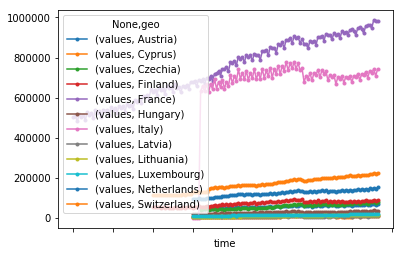

In [151]:
pum = df_gdp.groupby(['time','geo']).sum().unstack() 
pum.plot(kind='line', marker='.')